In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [8]:
data2 = np.loadtxt("data/data2D.csv",delimiter=",")
data1000 = np.loadtxt("data/data1000D.csv",delimiter=",")

In [42]:
def droPCA(X, dim):
    '''Z AT + b = X'
    Z : n x d
    b : n x D
    A : D x d
    '''
    n, D = X.shape
    d = min([dim,n])
    b = np.mean(X, axis=0)
    Y = X-b
    U,S,Vt = np.linalg.svd(Y,full_matrices=False)
    Z = U[:,:d].reshape(n,d)
    A = (np.diag(S[:d])@Vt[:d,:]).T
    reconstruction = Z @ (A.T) + np.ones((n,1))*b
    return A, Z, b, reconstruction, (U,S,Vt)

In [52]:
def buggyPCA(X,dim):
    n, D = X.shape
    d = min([dim,n])
    U,S,Vt = np.linalg.svd(X,full_matrices=False)
    projection = X @ Vt[:d,:].T
    reconstruction = projection @ Vt[:d,:]
    return projection, reconstruction, (U,S,Vt)

In [53]:
def demeanPCA(X,dim):
    n, D = X.shape
    d = min([dim,n])
    mean = np.mean(X, axis=0)
    centered_X = X - mean
    U,S,Vt = np.linalg.svd(centered_X,full_matrices=False)
    projection = X @ Vt[:d,:].T
    reconstruction = projection @ Vt[:d,:]
    return projection, reconstruction,  (U,S,Vt), centered_X

In [54]:
def normalizedPCA(X,dim):
    n, D = X.shape
    d = min([dim,n])
    mean = np.mean(X, axis=0)
    std = np.std(X, axis=0)
    normalized_X = (X - mean) / std
    U,S,Vt = np.linalg.svd(normalized_X,full_matrices=False)
    projection = X @ Vt[:d,:].T
    reconstruction = projection @ Vt[:d,:]
    return projection, reconstruction,  (U,S,Vt), normalized_X
    

In [59]:
buggy_projection_2, buggy_reconstruction_2, _ = buggyPCA(data2,1)
demean_projection_2, demean_reconstruction_2, _, centered_X_2 = demeanPCA(data2,1)
norm_projection_2, norm_reconstruction_2, _, normalized_X_2 = normalizedPCA(data2,1)
A_2, Z_2, b_2, dro_reconstruction_2, _ = droPCA(data2,1)


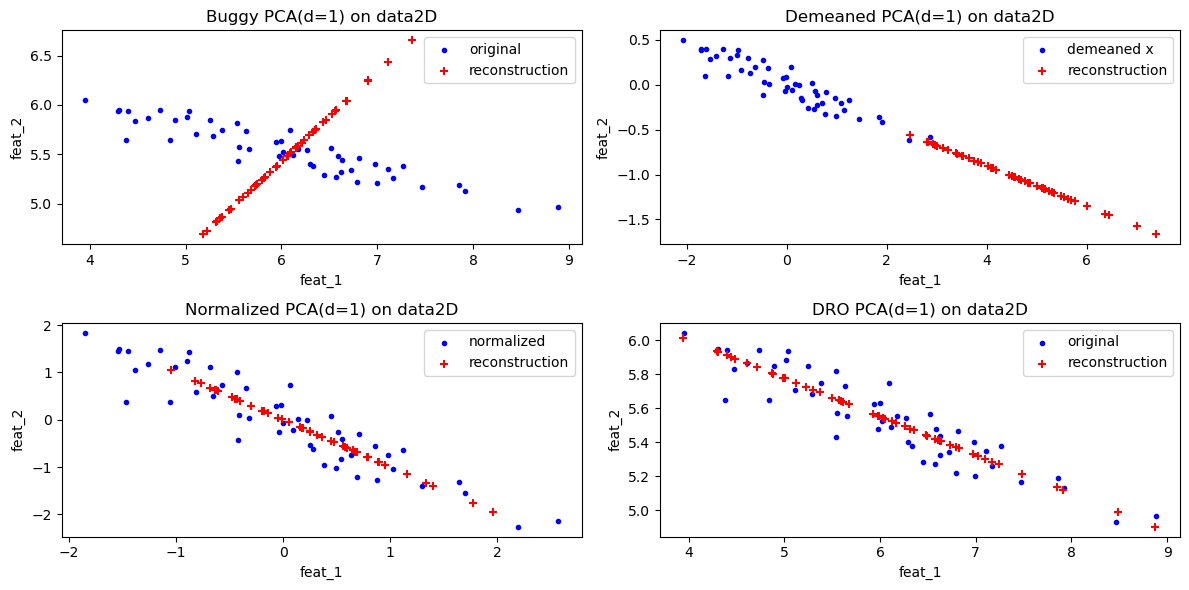

In [61]:
# 2D data comparison
plt.figure(figsize=(12, 6))

plt.subplot(2, 2, 1)
plt.scatter(data2[:,0], data2[:,1], marker='.', c='b', label='original x')
plt.scatter(buggy_reconstruction_2[:,0], buggy_reconstruction_2[:,1], marker='+', c='r', label='reconstruction')
plt.xlabel('feat_1')
plt.ylabel('feat_2')
plt.title('Buggy PCA(d=1) on data2D')
plt.legend()

plt.subplot(2, 2, 2)
plt.scatter(centered_X_2[:,0], centered_X_2[:,1], marker='.', c='b', label='demeaned x')
plt.scatter(demean_reconstruction_2[:,0], demean_reconstruction_2[:,1], marker='+', c='r', label='reconstruction')
plt.xlabel('feat_1')
plt.ylabel('feat_2')
plt.title('Demeaned PCA(d=1) on data2D')
plt.legend()

plt.subplot(2, 2, 3)
plt.scatter(normalized_X_2[:,0], normalized_X_2[:,1], marker='.', c='b', label='normalized x')
plt.scatter(norm_reconstruction_2[:,0], norm_reconstruction_2[:,1], marker='+', c='r', label='reconstruction')
plt.xlabel('feat_1')
plt.ylabel('feat_2')
plt.title('Normalized PCA(d=1) on data2D')
plt.legend()

plt.subplot(2, 2, 4)
plt.scatter(data2[:,0], data2[:,1], marker='.', c='b', label='original x')
plt.scatter(dro_reconstruction_2[:,0], dro_reconstruction_2[:,1], marker='+', c='r', label='reconstruction')
plt.xlabel('feat_1')
plt.ylabel('feat_2')
plt.title('DRO PCA(d=1) on data2D')
plt.legend()
plt.tight_layout()
plt.show()

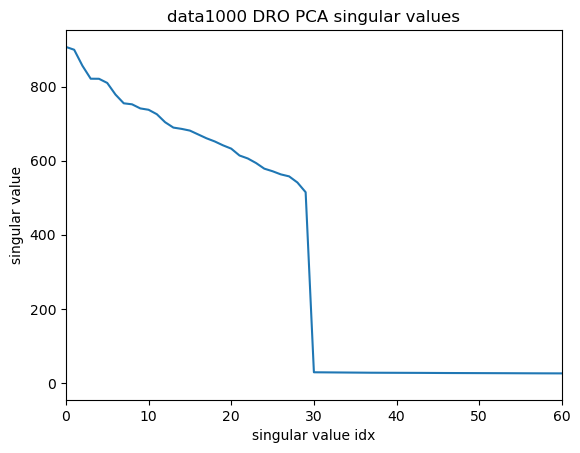

In [57]:
# find best d for data1000

*_, (U,S,Vt) = droPCA(data1000,1000)

plt.plot(range(500),S)
plt.xlim(0,60)
plt.xlabel('singular value idx')
plt.ylabel('singular value')
plt.title('data1000 DRO PCA singular values')
plt.show()

In [63]:
buggy_projection_1000, buggy_reconstruction_1000, _ = buggyPCA(data1000,30)
demean_projection_1000, demean_reconstruction_1000, _, centered_X_1000= demeanPCA(data1000,30)
norm_projection_1000, norm_reconstruction_1000, _, normalized_X_1000 = normalizedPCA(data1000,30)
A_1000, Z_1000, b_1000, dro_reconstruction_1000, _ = droPCA(data1000,30)

In [65]:
def mse(ori,recon):
    return  ((ori-recon)**2).mean() 

print(f'buggy MSE on 2D: {mse(data2,buggy_reconstruction_2):.3f}')
print(f'demean MSE on 2D: {mse(centered_X_2,demean_reconstruction_2):.3f}')
print(f'normalized MSE on 2D: {mse(normalized_X_2,norm_reconstruction_2):.3f}')
print(f'dro MSE on 2D: {mse(data2,dro_reconstruction_2):.3f}')
print(f'buggy MSE on 1000D: {mse(data1000,buggy_reconstruction_1000):.3f}')
print(f'demean MSE on 1000D: {mse(centered_X_1000,demean_reconstruction_1000):.3f}')
print(f'normalized MSE on 1000D: {mse(normalized_X_1000,norm_reconstruction_1000):.3f}')
print(f'dro MSE on 1000D: {mse(data1000,dro_reconstruction_1000):.3f}')


buggy MSE on 2D: 0.443
demean MSE on 2D: 10.826
normalized MSE on 2D: 0.190
dro MSE on 2D: 0.005
buggy MSE on 1000D: 0.803
demean MSE on 1000D: 15.688
normalized MSE on 1000D: 34.516
dro MSE on 1000D: 0.273
